# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Setup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
import time
from config import api_key
from citipy import citipy
import scipy.stats as st
from scipy.stats import linregress

## Generate Cities List

In [2]:
# Pulling the Cities
lat_range = (-90, 90)
lng_range = (-180, 180)
lat_lng_list = []
cities = []

# Generate Latitudes
lat = np.random.uniform(lat_range[0], lat_range[1],size= 1500)
lng = np.random.uniform(lng_range[0], lng_range[1],size= 1500)
lat_lng_list = zip(lat, lng)

for lat_lng in lat_lng_list:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    if city not in cities:
        cities.append(city)
len(cities)

620

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
#url = "http://api.openweathermap.org/data/2.5/weather?"
#query_url = url + "appid=" + api_key + "&q=" + "London"
#result = requests.get(query_url).json()
#result

In [4]:
data= []
counter = 0
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{url}appid={api_key}&units={units}&q=" 
#print(query_url)
for city in cities:
    result = requests.get(query_url+city).json()
    counter = counter + 1
    #print(result)
    try:
        lat = result["coord"]["lat"]
        lng = result["coord"]["lon"]
        temp_max = result["main"]["temp_max"]
        humidity = result["main"]["humidity"]
        cloudiness = result["clouds"]["all"]
        wind_speed = result["wind"]["speed"]
        country = result["sys"]["country"]
        date = result["dt"]
        data.append([city, lat, lng, temp_max, humidity, cloudiness, wind_speed, country, date])
        print(f"{counter} {city}")
        #print(city)
        time.sleep(1)
        
    except:
        print("City not found")

1 thompson
2 katsuura
3 arraial do cabo
4 lavrentiya
5 provideniya
6 jamestown
7 santiago
8 korsakovo
9 gaoual
10 nhulunbuy
11 fortuna
12 isangel
13 ushuaia
14 hilo
15 grand-santi
16 eyl
17 svetlyy
18 cape town
19 bilibino
20 nanortalik
City not found
22 dikson
23 hattiesburg
24 new norfolk
25 qaanaaq
26 roma
27 kavaratti
28 margate
29 hobart
30 shitanjing
31 butaritari
32 rikitea
City not found
34 rincon
City not found
36 albany
37 alekseyevsk
38 boyolangu
39 sept-iles
40 sao joao da barra
41 maltahohe
42 leningradskiy
43 bredasdorp
44 carnarvon
45 georgetown
46 yerbogachen
47 fare
48 aklavik
49 port-gentil
50 masunga
51 binga
City not found
53 tasiilaq
54 ouahigouya
55 mae ramat
56 torbay
57 haines junction
58 praia da vitoria
59 lorengau
60 mataura
61 camana
62 atuona
City not found
64 punta arenas
65 mar del plata
66 gallup
67 tommot
68 vanavara
City not found
70 hithadhoo
71 mahebourg
72 geraldton
73 severo-kurilsk
74 alofi
75 srednekolymsk
76 hermanus
77 barrow
78 saint-francois


617 atasu
618 nago
619 rio gallegos
620 hanover


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [27]:
city_df = pd.DataFrame(data, columns = ["City", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed", "Country", "Date"])
city_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,thompson,55.74,-97.86,28.40,74,75,10.29,CA,1603325810
1,katsuura,35.13,140.30,64.40,63,75,9.17,JP,1603325661
2,arraial do cabo,-22.97,-42.03,73.13,88,9,14.41,BR,1603325721
3,lavrentiya,65.58,-171.00,38.17,85,0,5.77,RU,1603325814
4,provideniya,64.38,-173.30,41.00,80,90,2.24,RU,1603325755
...,...,...,...,...,...,...,...,...,...
576,kaduqli,11.02,29.72,77.68,67,96,4.47,SD,1603326563
577,atasu,48.68,71.64,41.76,66,100,16.40,KZ,1603326565
578,nago,26.59,127.98,77.00,94,90,6.93,JP,1603326566
579,rio gallegos,-51.62,-69.22,51.80,57,98,3.36,AR,1603326437


In [28]:
city_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,581.000000,581.000000,581.000000,581.000000,581.000000,581.000000,5.810000e+02
mean,20.951291,20.659036,58.987745,75.611015,54.041308,7.602685,1.603326e+09
std,33.234400,91.672007,20.771086,19.319014,37.090546,4.875885,2.722924e+02
min,-54.800000,-175.200000,3.430000,7.000000,0.000000,0.490000,1.603325e+09
25%,-6.220000,-64.710000,42.800000,67.000000,16.000000,4.090000,1.603326e+09
50%,27.910000,26.400000,63.180000,80.000000,65.000000,6.710000,1.603326e+09
75%,49.820000,106.100000,76.960000,89.000000,90.000000,10.290000,1.603326e+09
max,78.220000,179.320000,95.000000,100.000000,100.000000,27.360000,1.603327e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [7]:
city_df["Humidity"]>100

0      False
1      False
2      False
3      False
4      False
       ...  
576    False
577    False
578    False
579    False
580    False
Name: Humidity, Length: 581, dtype: bool

In [8]:
#  Get the indices of cities that have humidity over 100%.


In [9]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


In [29]:
#Export CSV file
city_df.to_csv("Output_Data/cities.csv", index=False)

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

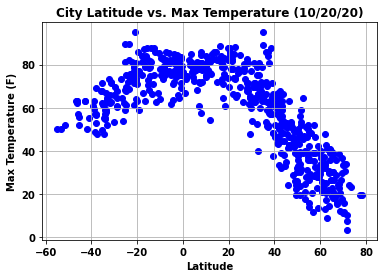

In [30]:
# Create the Scatter Plot
plt.scatter(city_df["Lat"], city_df["Max Temp"], facecolor= "blue")
plt.title("City Latitude vs. Max Temperature (10/20/20)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid()
plt.savefig("Images/CityLatitudevsMaxTemperature.png")

The greatest concentration of highest temperature typically occurs around 0 (the Equator) and drops as you move away from it in either direction

## Latitude vs. Humidity Plot

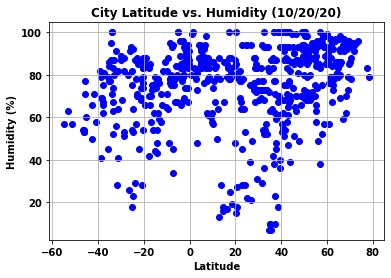

In [31]:
# Create the Scatter Plot
plt.scatter(city_df["Lat"], city_df["Humidity"], facecolor= "blue")
plt.title("City Latitude vs. Humidity (10/20/20)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()
plt.savefig("Images/CityLatitudevsHumidity.png")

Humidity seems to be lower in polar regions and increases as you move towards the souther hemisphere

## Latitude vs. Cloudiness Plot

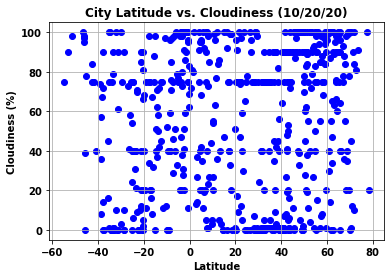

In [32]:
# Create the Scatter Plot
plt.scatter(city_df["Lat"], city_df["Cloudiness"], facecolor= "blue")
plt.title("City Latitude vs. Cloudiness (10/20/20)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()
plt.savefig("Images/CityLatitudevsCloudiness.png")

Does not seem to be any effect on cloudiness as you move across the latitude

## Latitude vs. Wind Speed Plot

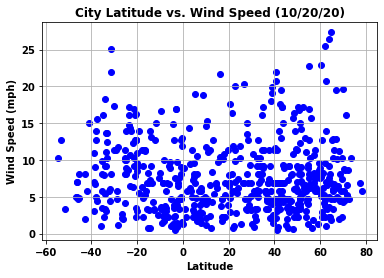

In [33]:
# Create the Scatter Plot
plt.scatter(city_df["Lat"], city_df["Wind Speed"], facecolor= "blue")
plt.title("City Latitude vs. Wind Speed (10/20/20)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid()
plt.savefig("Images/CityLatitudevsWindSpeed.png")

Does not seem to be any effect on wind speed as you move across the latitude

## Linear Regression

In [34]:
# Create a northern and southern hemisphere DataFrame
northern_hem = city_df.loc[city_df["Lat"]>= 0]
southern_hem = city_df.loc[city_df["Lat"]< 0]

In [18]:
def linear_regression(x, y):
    print(f"The r-squared is : {round(st.pearsonr(x, y)[0], 2)}")
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress_values = x * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept, 2))
    plt.scatter(x, y)
    plt.plot (x, regress_values, "r-")
    return line_eq

# Annotating
def annotate(line_eq, a, b):
    plt.annotate(line_eq,(a,b), fontsize=15,color="red")

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is : -0.87


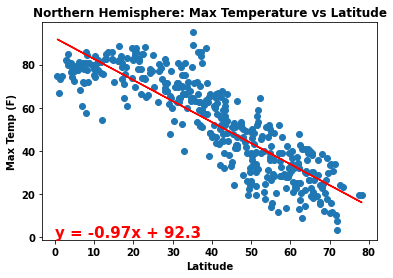

In [35]:
equation = linear_regression(northern_hem["Lat"], northern_hem["Max Temp"])
annotate(equation, 0, 0)

plt.title("Northern Hemisphere: Max Temperature vs Latitude")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (F)")
plt.savefig("Images/NorthernMaxTempvsLatitude.png")

There seems to be a strong negative correlation between max temperature and latitude in the northern hemisphere

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is : 0.69


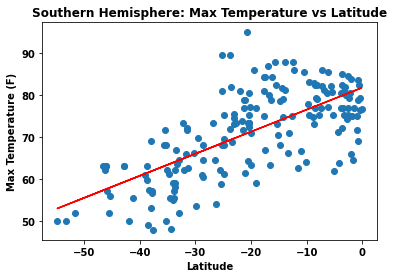

In [36]:
# Call the functions from above
equation = linear_regression(southern_hem["Lat"], southern_hem["Max Temp"])
annotate(equation, -30,40)

# Plot it
plt.title("Southern Hemisphere: Max Temperature vs Latitude")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.savefig("Images/SouthernMaxTempvsLatitude.png")

There appears to be a strong correlation between max temperature and latitude in the sothern hemisphere

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is : 0.25


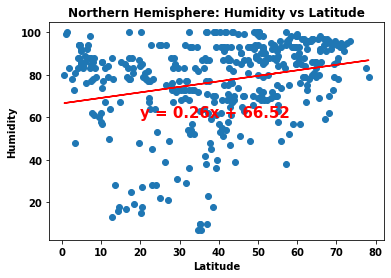

In [37]:
equation = linear_regression(northern_hem["Lat"], northern_hem["Humidity"])
annotate(equation, 20, 60)

plt.title("Northern Hemisphere: Humidity vs Latitude")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.savefig("Images/NorthernHumidityvsLatitude.png")

There appears to be a moderate positive coorection between humidity and latitude in the northern hesmipshere

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is : 0.69


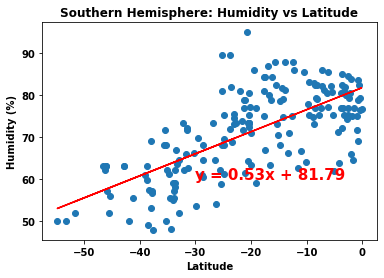

In [38]:
equation = linear_regression(southern_hem["Lat"], southern_hem["Max Temp"])
annotate(equation, -30, 60)

plt.title("Southern Hemisphere: Humidity vs Latitude")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.savefig("Images/SouthernHumidityvsLatitude.png")

There appears to be a strong correlation between humidity and latitude in the southern hemisphere

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is : 0.17


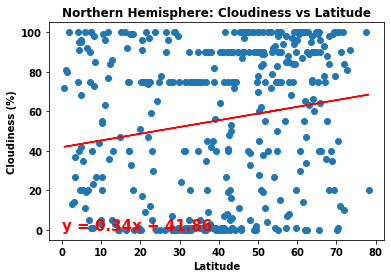

In [39]:
equation = linear_regression(northern_hem["Lat"], northern_hem["Cloudiness"])
annotate(equation, 0, 0)

plt.title("Northern Hemisphere: Cloudiness vs Latitude")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.savefig("Images/NorthernCloudinessvsLatitude.png")

There appears to be a moderately positive corrlation between cloudiness and latitude in the northern hemisphere

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is : 0.69


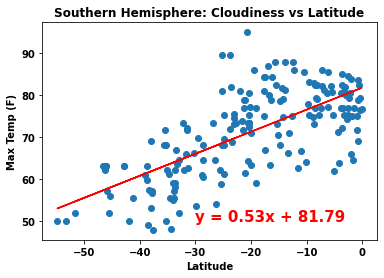

In [40]:
equation = linear_regression(southern_hem["Lat"], southern_hem["Max Temp"])
annotate(equation, -30, 50)

plt.title("Southern Hemisphere: Cloudiness vs Latitude")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (F)")
plt.savefig("Images/SouthernCloudinessvsLatitude.png")

There appears to be a strong correlation between cloudiness and latitude in the southern hemisphere

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is : 0.1


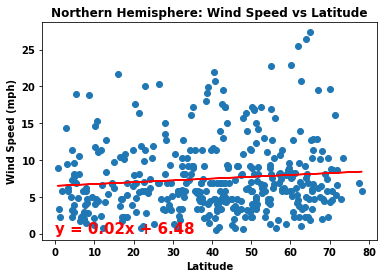

In [41]:
equation = linear_regression(northern_hem["Lat"], northern_hem["Wind Speed"])
annotate(equation, 0, 0)

plt.title("Northern Hemisphere: Wind Speed vs Latitude")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.savefig("Images/NorthernWindSpeedvsLatitude.png")

There is a positive correlation between wind speed and latitude in the northern hemisphere

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is : -0.19


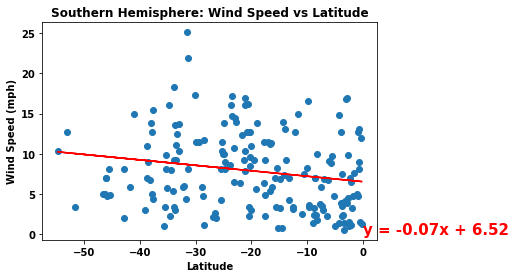

In [42]:
equation = linear_regression(southern_hem["Lat"], southern_hem["Wind Speed"])
annotate(equation, 0, 0)

plt.title("Southern Hemisphere: Wind Speed vs Latitude")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.savefig("Images/SouthernWindSpeedvsLatitude.png")

There is a negative correlation between wind speed and latitude in the southern hemisphere

1. There is a strong relationship between humidity and getting closer to the equator
2. Thought not as strong, there is also appears to be a postive relationship between cloudiness and latitude
3. The highest frequency of max temperature occurs at the equator